# Using Welly w/KGS data

Created by Thomas Martin, PhD canidate at [CoRE](https://core.mines.edu/) at Colorado School of Mines. Personal website is [here](https://tmartin.carrd.co/), and email is thomasmartin@mines.edu. One page research profile of CoRE is [here](https://core.mines.edu/wp-content/uploads/sites/206/2019/12/CoREOnePager-scaled.jpg). Feel free to reach out with any questions.

In [1]:
!pip install lasio
!pip install welly

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 81kB 3.3MB/s 
  Created wheel for welly: filename=welly-0.4.9-cp37-none-any.whl size=55559 sha256=e760b04a0d509a9a7d413eb7f7f37eef46b6adcfbbdb7cf40ca8d4127487a1e5
  Stored in directory: /root/.cache/pip/wheels/1d/8c/d2/6d4acd157d22653d469ddc3c92336e7810e29522d37b93d500
  Created wheel for striplog: filename=striplog-0.8.8-cp37-none-any.whl size=83655 sha256=f1061f9d9f9bf9d019e82ff6fd502895a2bc6a57fe5b39ca03ce3f9b69522462
  Stored in directory: /root/.cache/pip/wheels/f2/24/74/bd0c5947a61b8891bf41a3c7e7e3de470382315c1fae297402
Successfully built welly striplog


In [2]:
import lasio
print('lasio ver:',lasio.__version__)
import welly
print('welly ver:', welly.__version__)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

lasio ver: 0.28
welly ver: 0.4.9


Welly github is [here](https://github.com/agile-geoscience/welly/), [read the docs](https://welly.readthedocs.io/en/latest/) as well. 



In [3]:
cd drive/My Drive/T21_well_bonanza

/content/drive/My Drive/T21_well_bonanza


In [4]:
ls

0_ca_geotherm_data_explore.ipynb  awesome-plot.pdf     RAPI3723253.csv
1044753454.las                    ca_geothermal_data/  well_data.csv
1_UsingColab_andLasio.ipynb       kgs_2014_modified/   welly_test.ipynb
2_well_loading_with_welly.ipynb   petro-stats.csv      welly_test.pdf
3_sliderbar_decline.ipynb         proj4.las


## Let's load these in using welly

In [5]:
from welly import Project

ted = welly.defaults.ALIAS # alias list from Welly
from welly import Well

import welly.quality as q # we will use this a bit lower down

The Alias key list is here: https://github.com/agile-geoscience/welly/blob/master/welly/defaults.py



In [6]:
ted

{'CAL': ['HHCA',
  'SA',
  'HCALX',
  'DCAL',
  'CLXC',
  'CAX',
  'CAPD',
  'CANC',
  'CALZ',
  'CALX',
  'CALI',
  'CAL1',
  'CAL',
  'CADF',
  'CADE',
  'CA2',
  'CA1',
  'C13Z',
  'C13P',
  'C13M',
  'C13L',
  'C13I',
  'C13H',
  'C13-A',
  'C13A',
  'C13',
  'ACAL',
  'C1',
  'C2',
  'C24',
  'C24A',
  'C24-A',
  'C24H',
  'C24I',
  'C24L',
  'C24M',
  'C24P',
  'C24Z',
  'CA',
  'CAL2',
  'CAL3',
  'CALA',
  'CAL-A',
  'CALD',
  'CALE',
  'CALH',
  'CALI_SPCS',
  'CALL',
  'CALM',
  'CALN',
  'CALP',
  'CALS',
  'CALT',
  'CALX-A',
  'CALXH',
  'CALXM',
  'CALX-ML',
  'CALXQ8',
  'CALXQH',
  'CALX-R',
  'CALY',
  'CALY-A',
  'CALYH',
  'CALYM',
  'CALY-ML',
  'CALYQ8',
  'CALYQH',
  'CAY',
  'CLCM',
  'CLDC',
  'CLDM',
  'CLLO',
  'CLTC',
  'CLYC',
  'CQLI',
  'HCAL',
  'HCAL2',
  'HCALI',
  'HCALY',
  'HD',
  'HD_1',
  'HD1',
  'HD2',
  'HD3',
  'HDAR',
  'HDIA',
  'HDMI',
  'HDMN',
  'HDMX',
  'HLCA',
  'LCAL',
  'MCAL',
  'MLTC',
  'TAC2',
  'C3',
  'CLS2',
  'MBTC',
  'TACC',

In [7]:
p = Project.from_las("kgs_2014_modified/*.las")

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/welly/well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
24it [00:55,  2.30s/it]


Deleted some wells just for the sake of speed, but ~500 wells took <10 minutes on a weird Colab enviroment. I would budget 1-2s per well. 

In [8]:
p

Index,UWI,Data,Curves
0,15-009-25884,14 curves,"CNPOR, DCAL, DPOR, GR, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, MEL15, MEL20, MELCAL"
1,15189226790000,29 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, GR, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR"
2,15175221840000,29 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR, GR"
3,15175221850000,34 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, GR, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR, DT, ITTT, MMK, SPHI, TPUL"
4,,18 curves,"BVTX, AVTX, RXORT, CILD, RLL3, SP, RILD, RILM, DCAL, RHOB, RHOC, DPOR, CNLS, GR, DGA, MCAL, MI, MN"
5,,16 curves,"ABHV, CNPOR, DCAL, DPOR, GR, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, TBHV, MEL15, MEL20, MELCAL"
6,15-109-21040,17 curves,"ABHV, CNPOR, DCAL, DPOR, GR, PE, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, TBHV, MEL15, MEL20, MELCAL"
7,15-189-22677,20 curves,"GR, CALI, SP, TENS, ITTT, BHVT, AHVT, RXO, RT60, RT90, SPHI, DPHI, NPHI, CT90, DT, RHOB, PE, DRHO, MINV, MNOR"
8,15189226780000,32 curves,"CALI, DPHD, DPHI, DPHS, DRHO, GR, NPHD, NPHI, NPHL, NPHS, PE, QF, QN, RHOB, CT90, RMUD, RT, RT06, RT10, RT20, RT30, RT60, RT90, RXO, RXRT, SP, TENS, MINV, MNOR, ITTT, DELTAT, SPHI"
9,,19 curves,"AVTX, BVTX, CILD, CNDL, CNLS, CNPOR, CNSS, DCAL, DPOR, GR, LSPD, LTEN, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP"


In [9]:
files = glob("kgs_2014_modified/*.las")

In [10]:
uwi_conv = {'UWI': 'API'} 

wells = [Well.from_las(file, index='ft', remap=uwi_conv) for file in files]
proj = Project(wells)

In [11]:
proj

Index,UWI,Data,Curves
0,,14 curves,"CNPOR, DCAL, DPOR, GR, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, MEL15, MEL20, MELCAL"
1,15189226790000,29 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, GR, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR"
2,15175221840000,29 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR, GR"
3,,34 curves,"TENS, SP, RXRT, RXO, RT90, RT60, RT30, RT20, RT10, RT, RMUD, RHOB, QN, QF, PE, NPHS, NPHL, NPHI, NPHD, GR, DRHO, DPHS, DPHI, DPHD, DLIM, CT90, CALI, MINV, MNOR, DT, ITTT, MMK, SPHI, TPUL"
4,15-109-21191-00-00,18 curves,"BVTX, AVTX, RXORT, CILD, RLL3, SP, RILD, RILM, DCAL, RHOB, RHOC, DPOR, CNLS, GR, DGA, MCAL, MI, MN"
5,15-193-20821-0000,16 curves,"ABHV, CNPOR, DCAL, DPOR, GR, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, TBHV, MEL15, MEL20, MELCAL"
6,15-109-21040,17 curves,"ABHV, CNPOR, DCAL, DPOR, GR, PE, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP, TBHV, MEL15, MEL20, MELCAL"
7,15-189-22677,20 curves,"GR, CALI, SP, TENS, ITTT, BHVT, AHVT, RXO, RT60, RT90, SPHI, DPHI, NPHI, CT90, DT, RHOB, PE, DRHO, MINV, MNOR"
8,15189226780000,32 curves,"CALI, DPHD, DPHI, DPHS, DRHO, GR, NPHD, NPHI, NPHL, NPHS, PE, QF, QN, RHOB, CT90, RMUD, RT, RT06, RT10, RT20, RT30, RT60, RT90, RXO, RXRT, SP, TENS, MINV, MNOR, ITTT, DELTAT, SPHI"
9,15-007-22999-00-01,19 curves,"AVTX, BVTX, CILD, CNDL, CNLS, CNPOR, CNSS, DCAL, DPOR, GR, LSPD, LTEN, RHOB, RHOC, RILD, RILM, RLL3, RXORT, SP"


# Let's investigate one well from this project

In [12]:
proj[4]

Well(uwi: '15-109-21191-00-00', 18 curves: ['BVTX', 'AVTX', 'RXORT', 'CILD', 'RLL3', 'SP', 'RILD', 'RILM', 'DCAL', 'RHOB', 'RHOC', 'DPOR', 'CNLS', 'GR', 'DGA', 'MCAL', 'MI', 'MN'])

If you want a dictionary of the header

In [13]:
proj[4].header

{'name': "Weber Trust 'B' #1-1", 'uwi': '15-109-21191-00-00', 'field': 'Loganberry', 'api': '15-109-21191-00-00', 'company': 'Brito Oil Company, Inc.'}

Make a plot for all of the curves, this is a great, quick, QC.

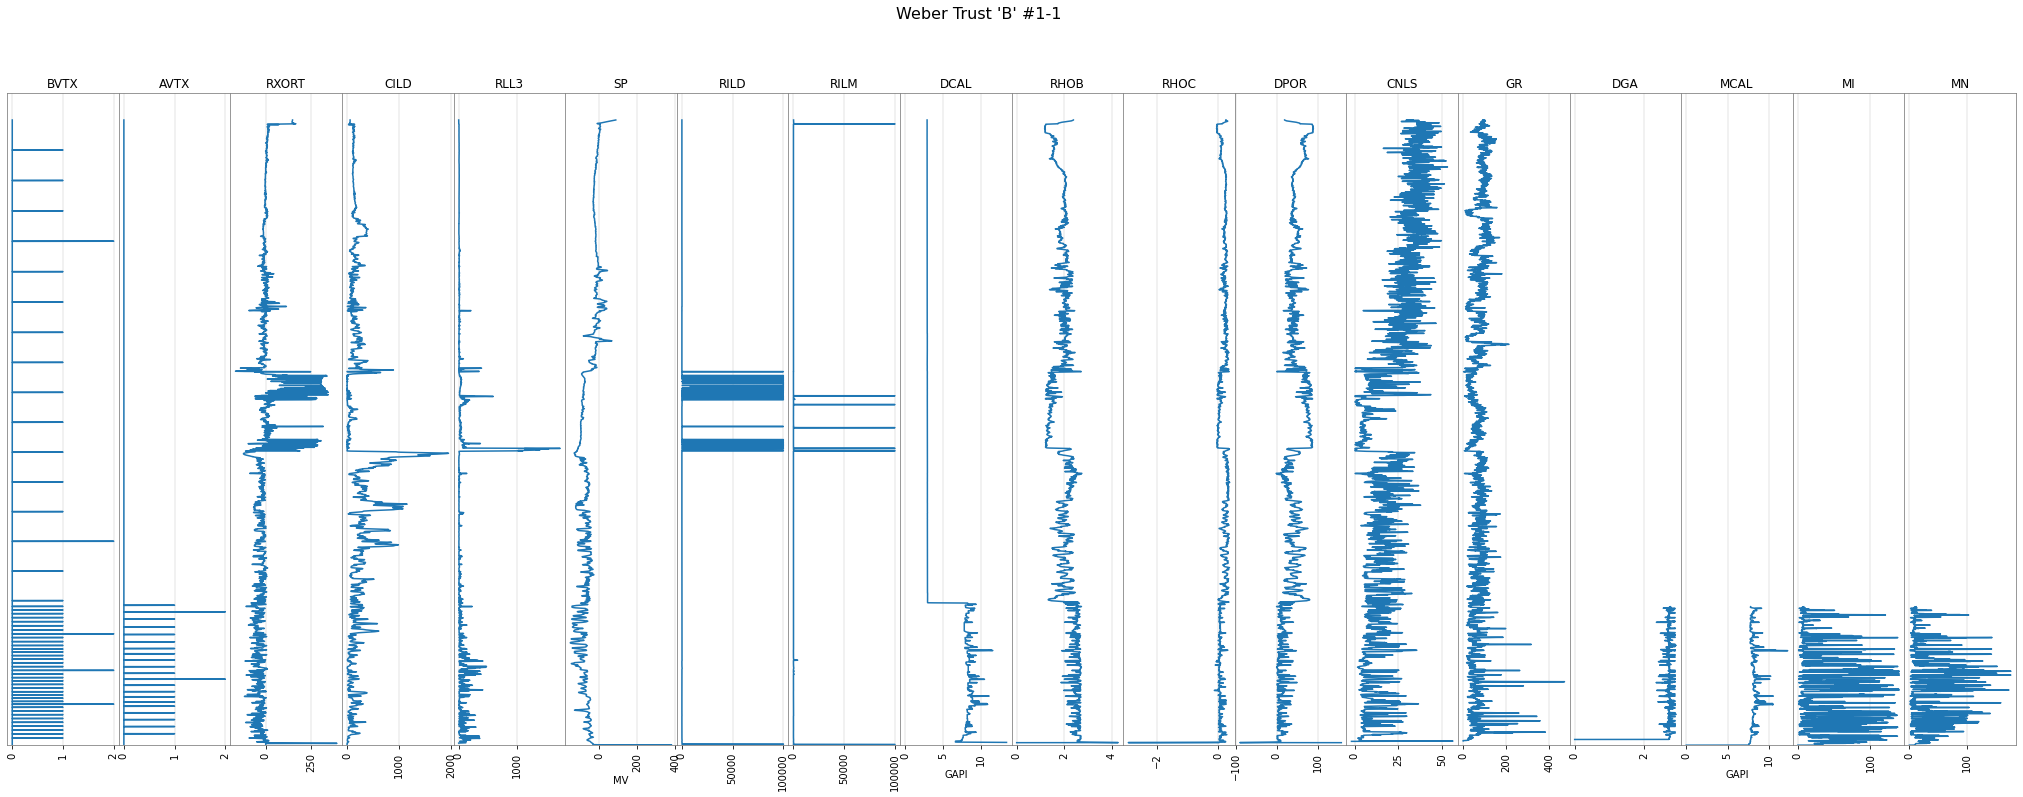

In [14]:
proj[4].plot()

In [15]:
proj[4].to_las('proj4.las')

In [16]:
df_orig = proj.df()
df_orig

CNPOR  DCAL  DPOR        GR  ...  TT2  TT3  TT4  CDTF
UWI                Depth                                ...                     
                   0.0       NaN   NaN   NaN  513.6719  ...  NaN  NaN  NaN   NaN
                   0.5       NaN   NaN   NaN  324.2895  ...  NaN  NaN  NaN   NaN
                   1.0       NaN   NaN   NaN  214.3778  ...  NaN  NaN  NaN   NaN
                   1.5       NaN   NaN   NaN  153.9708  ...  NaN  NaN  NaN   NaN
                   2.0       NaN   NaN   NaN  119.5366  ...  NaN  NaN  NaN   NaN
...                          ...   ...   ...       ...  ...  ...  ...  ...   ...
15-131-20222-00-00 3966.5    NaN   NaN   NaN       NaN  ...  NaN  NaN  NaN   NaN
                   3967.0    NaN   NaN   NaN       NaN  ...  NaN  NaN  NaN   NaN
                   3967.5    NaN   NaN   NaN       NaN  ...  NaN  NaN  NaN   NaN
                   3968.0    NaN   NaN   NaN       NaN  ...  NaN  NaN  NaN   NaN
                   3968.5    NaN   NaN   NaN       NaN  ...  NaN  NaN  NaN   NaN

[231159 rows x 119 columns]

# Alias Dataframe

Let's use the alias defaults in welly. You can always roll your own curves if you have a preference.  

In [17]:
df_alias = proj.df(keys=['CAL', 'GR', 'DT', 'SP', 'DENS', 'PE', 'RESD', 'PHIN', 'PHID'], alias=ted)
df_alias = df_alias.dropna(thresh=7) # dropping all rows with 7 NaN's, just for this demo
df_alias.head(10)

CAL        GR        SP  ...      PE    PHIN  DT
UWI            Depth                               ...                    
15189226790000 2383.0  8.0054  103.7800  154.8387  ...  3.4314  0.3154 NaN
               2383.5  8.0022   93.0505  155.0213  ...  3.5495  0.2605 NaN
               2384.0  7.9944   88.2144  155.3806  ...  3.6510  0.2612 NaN
               2384.5  8.0215   89.9503  154.6360  ...  3.6127  0.2988 NaN
               2385.0  8.0484   97.5652  153.2455  ...  3.4804  0.3132 NaN
               2385.5  8.0979   92.2076  151.9578  ...  3.3884  0.3098 NaN
               2386.0  8.1292   74.7633  152.1430  ...  3.3863  0.2484 NaN
               2386.5  8.0952   65.5626  153.8240  ...  3.5125  0.2097 NaN
               2387.0  8.0787   54.1902  154.0225  ...  3.8450  0.1837 NaN
               2387.5  8.0215   38.3889  152.7500  ...  4.2319  0.1448 NaN

[10 rows x 9 columns]

### Making a new curve

If you want to apply petrophysical transforms to your data, this is one place to do it! We are going to mutiply DT by GR. This might not make any sense ..... but is just provided here as an example.

In [18]:
df_alias["GRxDT"] = df_alias.GR.values * df_alias.DT.values # any formula you like
df_alias

CAL        GR        SP  ...    PHIN  DT  GRxDT
UWI                Depth                               ...                   
15189226790000     2383.0  8.0054  103.7800  154.8387  ...  0.3154 NaN    NaN
                   2383.5  8.0022   93.0505  155.0213  ...  0.2605 NaN    NaN
                   2384.0  7.9944   88.2144  155.3806  ...  0.2612 NaN    NaN
                   2384.5  8.0215   89.9503  154.6360  ...  0.2988 NaN    NaN
                   2385.0  8.0484   97.5652  153.2455  ...  0.3132 NaN    NaN
...                           ...       ...       ...  ...     ...  ..    ...
15-131-20222-00-00 3900.5  7.6700  170.5400   56.3500  ...     NaN NaN    NaN
                   3901.0  7.8100  175.7300   59.0000  ...     NaN NaN    NaN
                   3901.5  7.8900  182.1800   62.5900  ...     NaN NaN    NaN
                   3902.0  8.0100  181.7400   65.3600  ...     NaN NaN    NaN
                   3902.5  8.0100  179.7300   67.7400  ...     NaN NaN    NaN

[118873 rows x 10 columns]

In [19]:
df_alias.describe()

,CAL,GR,SP,DENS,RESD,PHID,PE,PHIN,DT,GRxDT
count,118873.000000,118748.000000,118614.000000,118873.000000,107309.000000,118873.000000,105077.000000,90777.000000,45676.000000,45551.000000
mean,7.533064,65.634876,-28.352468,2.497128,167.051808,7.723332,3.927130,4.738473,70.820316,5095.042017
std,1.694531,44.111364,536.394986,0.298316,3846.167152,16.537734,0.772493,10.994831,16.726362,4520.387153
min,2.340400,-9.997200,-2644.691900,0.001000,0.392300,-17.350000,0.001700,-47.199500,38.840000,-601.732468
25%,7.788000,35.045625,32.700000,2.464700,3.886300,0.046100,3.423100,0.089600,58.099725,2029.624242
50%,7.920200,54.797150,92.321300,2.579700,7.492400,0.131300,4.024300,0.159700,65.682350,3413.912011
75%,8.083500,87.403500,155.478650,2.646000,17.022400,8.840100,4.538500,0.365600,80.498275,7034.731955
max,18.591800,754.483300,403.740000,3.006700,100000.000000,846.150000,9.750000,54.885500,170.610000,68149.709400


Text(0, 0.5, 'Counts')

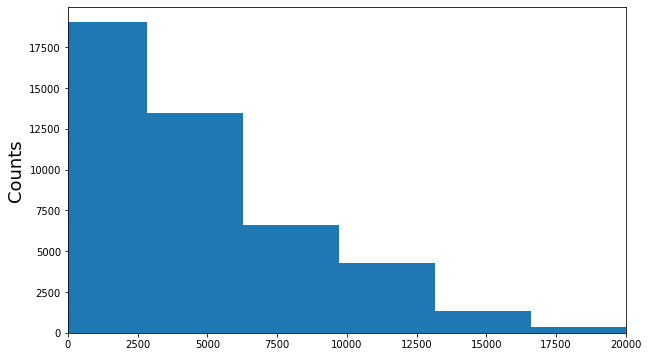

In [20]:
plt.figure(figsize=(10,6))

plt.hist(df_alias.GRxDT.values, bins=20)
plt.xlim(0, 20000)
plt.ylabel('Counts', size=18)

# Writing out HTML table

In [21]:
from IPython.display import HTML

d = (proj.curve_table_html(alias=ted))

HTML(proj.curve_table_html(alias=ted))

In [22]:
tests = {
#    'Each': [q.no_gaps],
    'GR': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
}

In [23]:
HTML(proj.curve_table_html(keys=['CAL', 'GR', 'DT', 'SP', 'DENS', 'PE', 'RESD', 'PHIN', 'PHID'], tests=tests, alias=ted))

# Cross plot

(0.0, 10.0)

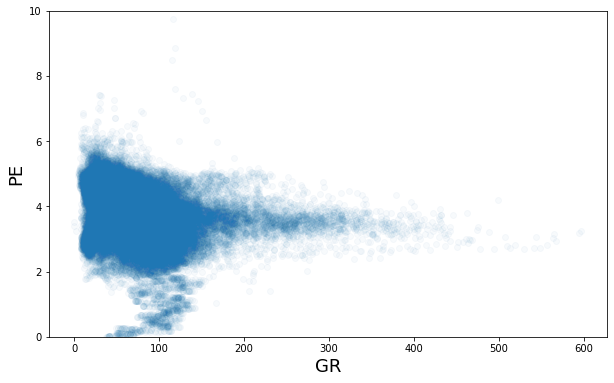

In [24]:
plt.figure(figsize=(10,6))

DENS_max = df_alias.DENS.values.max()
colors =  np.random.rand(len(df_alias.GR.values))

plt.scatter(df_alias.GR.values, df_alias.PE.values, alpha=0.03)

plt.xlabel('GR', size=18)
plt.ylabel('PE', size=18)
plt.ylim((0,10))